#  Author: Raj Khandagale
## GRIP @ The Sparks Foundation
### Task 1- Prediction using Supervised ML with R 
#### In this section, we will see how we can perform machine learning using R programming language , which can be used to implement regression functions.
#### In this machine learning task we will predict the score that a student is expected to get based upon the number of hours they studied.
#### Model involved in this is simple linear regression model as it involves just two variables- Hours( studied by student) and Scores(Scores obtained by student )

***

##  Step1 : Importing libraries

In [1]:
#importing libraries 
library(tseries)   #to import data through link directly 
library(tidyverse)

Warning message:
"package 'tseries' was built under R version 3.6.3"Registered S3 method overwritten by 'xts':
  method     from
  as.zoo.xts zoo 
Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang
Registered S3 method overwritten by 'rvest':
  method            from
  read_xml.response xml2
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v ggplot2 3.1.1       v purrr   0.3.2  
v tibble  2.1.1       v dplyr   0.8.0.1
v tidyr   0.8.3       v stringr 1.4.0  
v readr   1.3.1       v forcats 0.4.0  
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()


***

## Step 2 : Importing and Analyzing Dataset

In [24]:
Data=read.csv("http://bit.ly/w-data")
head(Data)
str(Data)
dim(Data)
Y=Data$Scores
X=Data$Hours

Hours,Scores
2.5,21
5.1,47
3.2,27
8.5,75
3.5,30
1.5,20


'data.frame':	25 obs. of  2 variables:
 $ Hours : num  2.5 5.1 3.2 8.5 3.5 1.5 9.2 5.5 8.3 2.7 ...
 $ Scores: int  21 47 27 75 30 20 88 60 81 25 ...


[1] 25  2

From above results we can clearly observe that dataset has __25 observations and 2 variables__ which are __hours & scores__ 
scores are in the form of integer and hours are in the form of numeric.

In [23]:
sum(is.na(Data))

[1] 0

There are no missing values in the data so no treatment is required.

***

## Step 3 :- Plotting and Studying the relationship between variables

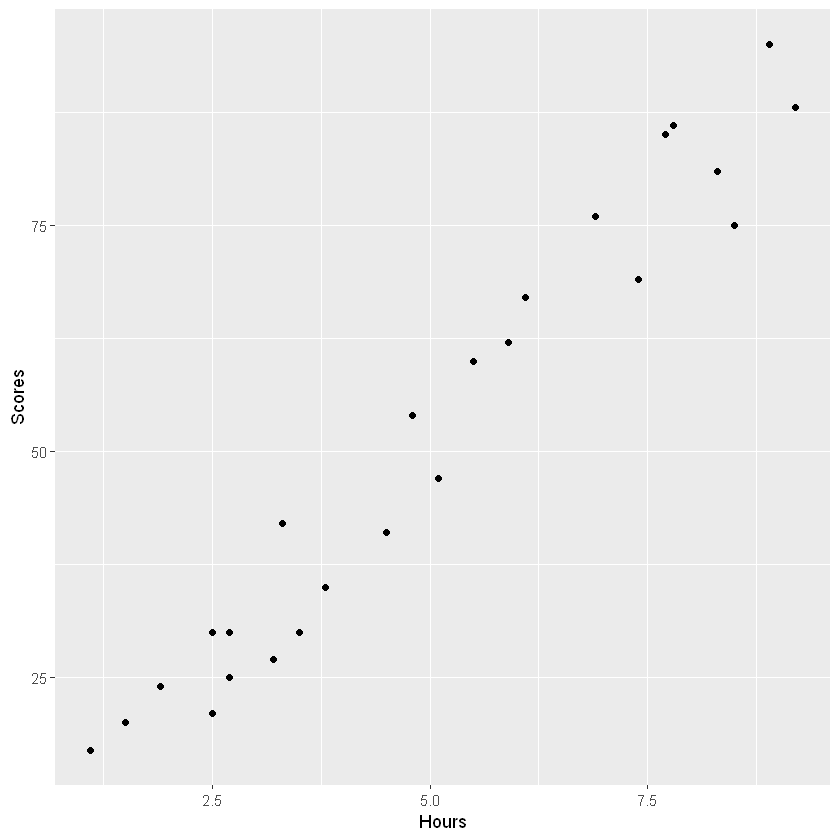

In [4]:
plot=ggplot(Data, aes(Hours, Scores)) + geom_point() 
plot

In [25]:
cor(Y , X)

[1] 0.9761907

from above graph we can clearly observe the __strong positive relationship__ between the hours studied by the student and score obtained and that amount of correlation is __0.976190656022089__

***

## Step4 :- Fitting the Simple Linear Regression Model 

In [6]:
model=lm(Y~X)
summary(model)


Call:
lm(formula = Y ~ X)

Residuals:
    Min      1Q  Median      3Q     Max 
-10.578  -5.340   1.839   4.593   7.265 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)   2.4837     2.5317   0.981    0.337    
X             9.7758     0.4529  21.583   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 5.603 on 23 degrees of freedom
Multiple R-squared:  0.9529,	Adjusted R-squared:  0.9509 
F-statistic: 465.8 on 1 and 23 DF,  p-value: < 2.2e-16


From above summary we can clearely observe , 
From the P-value we can observe our model is significant at 1% error.

Fitted model is 
Y =  2.4837 + 9.7758*X ( where Y is score obtained and x is hours studied as mentioned earlier )

using this formula of model we can predict the values of scores given the amount of hours studied 
Also value of __R-SQUARED__ is __0.9529__ that indicates 95.29 % amount of variablity in the scores is explained by amount of hours studied.
which implies our model is good fit.

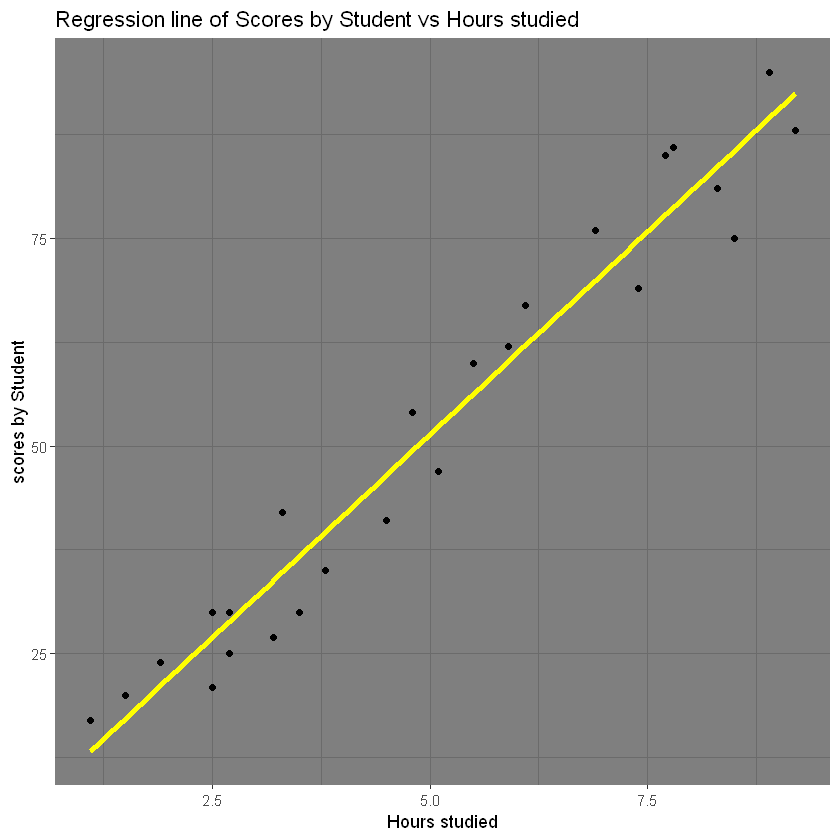

In [9]:
plot + labs(
            y="scores by Student",
            x="Hours studied",
        title = "Regression line of Scores by Student vs Hours studied"
         ) + theme_dark() +stat_smooth(method = "lm",
        col = 7,
        se = FALSE,
        size = 1.5)


In the above plot dots represnt the actual values and yellow straight line represents the fitted values of the model 

***

## Step 5 :- compairing actual V/s Fitted values 

In [10]:
# comparing actual V/s fitted values of model 
est_Y=fitted.values(model)
D=data.frame(est_Y , Y)
head(D)

est_Y,Y
26.92318,21
52.34027,47
33.76624,27
85.57800,75
36.69899,30
17.14738,20


In [26]:
Df=data.frame(c(1 , 6 , 11 , 16 , 21)  , Y[c( 1 , 6 , 11 , 16 , 21)] , est_Y[c( 1 , 6 , 11 , 16 , 21)] )
colnames(Df)<-c("no" , "y_obs", "y_fit")
Df

,no,y_obs,y_fit
1,1,21,26.92318
6,6,20,17.14738
11,11,85,77.75736
16,16,95,89.48832
21,21,30,28.87834


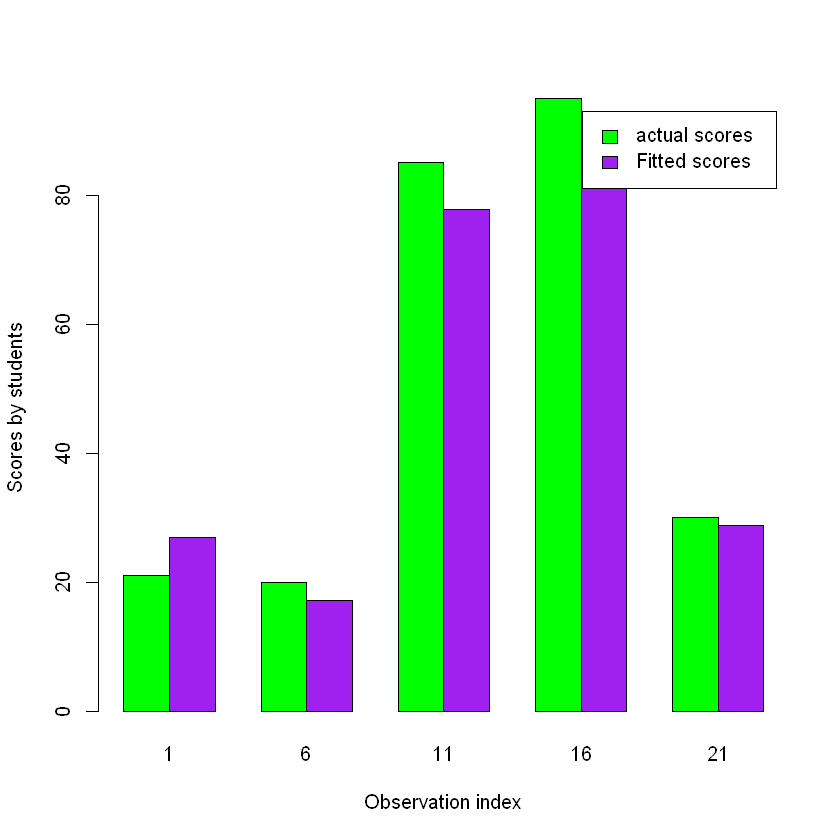

In [28]:
barplot(cbind(Df$y_obs, Df$y_fit) ~ Df$no ,
        beside = TRUE,
        xlab = "Observation index",
        ylab = "Scores by students",
        col = c("green", "purple"),
        legend.text = c("actual scores", "Fitted scores"))

Clearly from above graph we can see that __observed and fitted values of the scores__ are almost same which indicates that we have appropriately fitted the model 

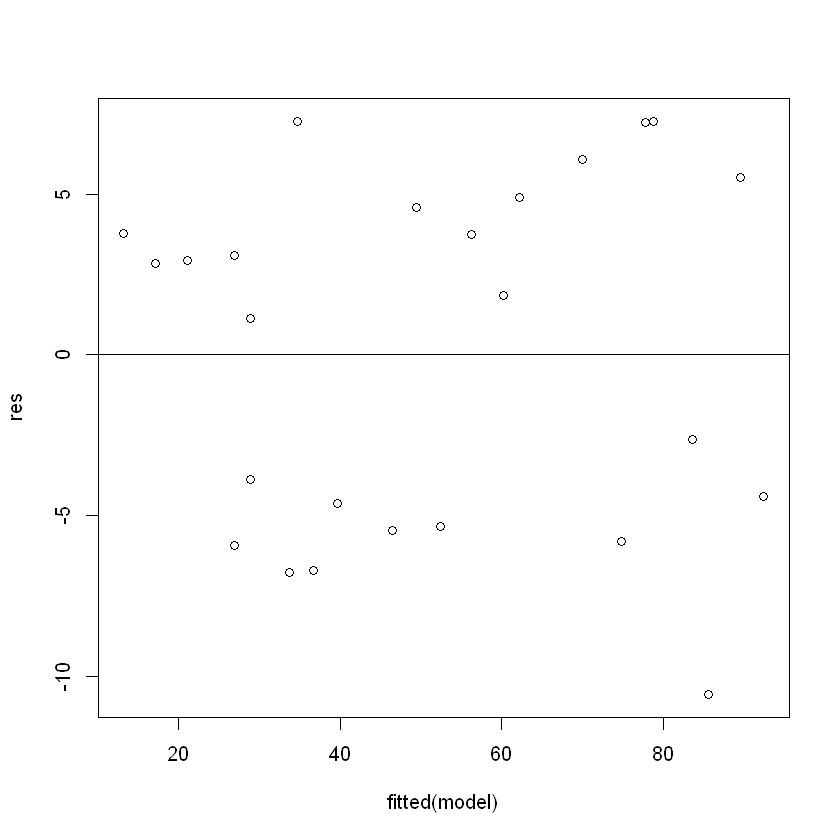

In [11]:
#define residuals
res <- resid(model)

#produce residual vs. fitted plot
plot(fitted(model), res)

#add a horizontal line at 0 
abline(0,0)

### Clear observations from the above plot are :- 

1)The residuals are spread randomly around the horizontal line at 0 indicates that the assumption that the relationship is linear

2)None of the residual fails to follow the basic random pattern(trend) of residuals.This suggests that there are no outliers.

***

## Step-6 :-  prediction of Score when no of hours studied per day is given 

In [20]:
new <- data.frame(X=c(9.25))
predict(model, newdata = new)

1 
92.90985

 #### If a student studies for 9.25 hours per day then he can approximately score 93 marks(marks given as integer) in the examination

***
***

## CONCLUSION OF TASK-1

### 1. We fitted the simple linear regression model of predictor hours studied per day on response variable Scores obatined in the exam

### 2.Fitted model is given by formula Y = 2.4837 + 9.7758*X ( where Y is score obtained and x is hours studied as mentioned earlier )

### 3. value of R-SQUARED is 0.9529 that indicates __95.29 %__ amount of variablity in the scores is explained by amount of hours studied. which implies our model is good fit.

### 4. If a student studies for __9.25 hours per day__ then he can approximately score __93 marks__ in the examination

***
***

# THANK YOU 